# Networks

A network graph is a mathematical model that is composed of vertices and edges, $G = (V, E)$

<img src='../images/basic_network.png'>

This mathematical model facilitates the analysis of topology and interactions between entites. The first usage of a network was by Euler in the 1700s to solve a long-standing riddle concerning the [traversal of bridges in Konigsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_Königsberg). His insight may seem extremely simple, it involved the reduction of a physical reality to a mathematical object

<img src='../images/konigsberg_bridge.png'>

but it allowed for a mathematical proof to the riddle that was not easily achieved with other approaches.

# Analyzing networks with Python

There are primarily two packages you can use when you want to undertake network analysis. The first package is **NetworkX**, which has been under development for almost a decade now. The second is **graph-tool**, which is younger. graph-tool is significantly faster than NetworkX because most of the package is implemented in C++. However, this makes installation of the package more difficult.

For our purposes, we will use NetworkX in the class and it will be entirely sufficient. If, in your own research, you find that NetworkX is not sufficiently fast for your network (i.e. you are working with hundreds of thousands or more nodes) then I suggest that you invest the time to install graph-tool and rework your code (concepts/analysis of a network are largely universal, so the rewrite should not pose a significant time investment).

In [7]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    import networkx as nx
    import matplotlib.pyplot as plt

In [4]:
import networkx as nx

G = nx.Graph()
type(G)

networkx.classes.graph.Graph

We can then start with a very simple network that has four nodes - Alice, Bob, Carol, and David

In [5]:
individuals = ['Alice', 'Bob', 'Carol', 'David']
#Add the individuals
G.add_nodes_from(individuals)
G.nodes()

['Bob', 'David', 'Alice', 'Carol']

and at any time we could look at this network using matplotlib

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/rcsetup.p

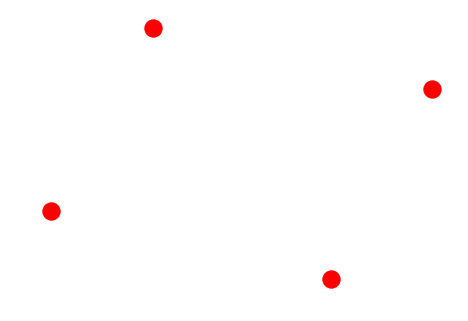

In [10]:
%matplotlib inline
nx.draw(G)

as you can see our graph is relatively boring since we haven't added any edges. Adding edges is pretty much the same as adding nodes.

In [15]:
friendships = [['Alice', 'Bob'], ['Alice', 'Carol'], ['Alice', 'David'],
               ['Bob', 'David'], ['David', 'Carol']]
G.add_edges_from(friendships)
G.edges()

[('Bob', 'David'),
 ('Bob', 'Alice'),
 ('David', 'Alice'),
 ('David', 'Carol'),
 ('Alice', 'Carol')]

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/rcsetup.p

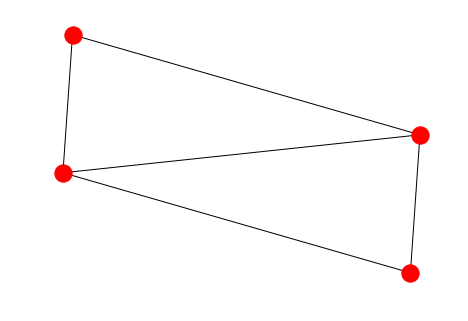

In [16]:
nx.draw(G)

and to confirm we can plot the node labels. To do so, we will need to use the function `graph_networkx_edge_labels()`. Read through the documentation to figure out how to do this as an exercise.

In [57]:
#Exercise 


Of course we can modify a network in place, adding or removing nodes

In [59]:
G.remove_node('David')
G.nodes()

['Alice', 'Bob', 'Carol']

Or add them one by one (of course we will not regain whatever edges were originially in the graph)

In [60]:
G.add_node('David')
G.nodes()

['Alice', 'David', 'Bob', 'Carol']

And of course we can do all the same operations with edges

In [61]:
G.remove_edge('Alice', 'Bob')
G.edges()

[('Alice', 'Carol')]

In [62]:
G.add_edge('Alice', 'Bob')
G.edges()

[('Alice', 'Bob'), ('Alice', 'Carol')]

The real advantage over keeping track of this information ourselves with a dictionary or list is the built in functions to tell us about graph properties. For example, we can quickly get the number of nodes or edges in the graph.

In [63]:
print('There are {0} nodes'.format(G.number_of_nodes()))

There are 4 nodes


In [64]:
print('There are {0} edges'.format(G.number_of_edges()))

There are 2 edges


## Setting and accessing Graph Attributes

We can add attributes to each of the nodes if there are features that we want to keep track of. For example, we might want to keep track of the gender.

In [65]:
G.node['Bob']['gender'] = 'Male'
#If we give the option data=True when we print nodes we can see the additional attributes
print( "Adding a gender attribute to Bob" )
print( G.nodes(data=True) )
print()
#We see that the attributes are stored as a dictionary for each node

#Now let's add all of the other attributes
genders = [['Alice', 'Female'], ['Carol', 'Female'], ['David', 'Male']]
for name, gender in genders:
    G.node[name]['gender'] = gender
print("Adding genders to all of the nodes")
print(G.nodes(data=True) )
print()

#Accessing nodes individually
print("Looking at the attributes for a single node, here we access Alice's attributes")
print(G.node['Alice'])

Adding a gender attribute to Bob
[('Alice', {}), ('David', {}), ('Bob', {'gender': 'Male'}), ('Carol', {})]

Adding genders to all of the nodes
[('Alice', {'gender': 'Female'}), ('David', {'gender': 'Male'}), ('Bob', {'gender': 'Male'}), ('Carol', {'gender': 'Female'})]

Looking at the attributes for a single node, here we access Alice's attributes
{'gender': 'Female'}


We can also add attributes to an edge, such as what type of edge it is. 
 

In [66]:
#We set edge attributes by directly referencing the nodes
G['Bob']['Alice']['edge_type'] = 'friendship'
print("Explicitly saying that the edge represents friendship")
print(G.edges(data=True))
print()

#We can now set all of these attributes
G.add_edges_from([['Bob', 'Carol'], ['David', 'Alice'], ['Alice', 'Carol']])
edge_type_attributes = [['Bob', 'Carol'], ['David', 'Alice'], ['Alice', 'Carol']]
for node_i, node_j in edge_type_attributes:
    G[node_i][node_j]['edge_type'] = 'friendship'
print("Setting the edge type for all of the edges in the network")
print(G.edges(data=True))
print()

#Looking at an individual edge
print("Looking at an individual edge's attributes is effectively the same as setting an attribute")
print(G['Bob']['Alice'])

Explicitly saying that the edge represents friendship
[('Alice', 'Bob', {'edge_type': 'friendship'}), ('Alice', 'Carol', {})]

Setting the edge type for all of the edges in the network
[('Alice', 'Bob', {'edge_type': 'friendship'}), ('Alice', 'David', {'edge_type': 'friendship'}), ('Alice', 'Carol', {'edge_type': 'friendship'}), ('Bob', 'Carol', {'edge_type': 'friendship'})]

Looking at an individual edge's attributes is effectively the same as setting an attribute
{'edge_type': 'friendship'}


## Different types of networks

So far what we have constructed is an **undirected unweighted** network. Let's go over what each of these two terms mean individually.

### Undirected vs. Directed

An **undirected** network means that an edge has no direction, in our network an edge means that an edge goes for both of the nodes.

If we wanted to examine a network where we looked at who initiated a conversation with whom during a day, we would want a **directed** network.

<img src="http://www.mathaware.org/mam/04/images/5_directed_network.gif" width="200px"></img>

In a directed network an edge is displayed with an arrow and it shows the direction of the edge and it is not symmetric, **unlike** an undirected network. This means that if:
* Bob starts a conversation with Alice, then we would draw an edge from Bob to Alice with the arrow pointed to Alice
* Later that day Alice started a conversation with Bob, we would draw another edge from Alice to Bob, with the arrow pointed at Bob

### Unweighted vs. Weighted

An **unweighted** network has edges that are effectively binary, either there exists an edge between two nodes or there does not exist an edge. All edges that exist are counted the same.  This type of network makes sense for friendship, since two people are either friends or they are not. 

If we think about our conversation network though, we would want to know the **number** of times that two individuals interact --- especially because it is likely that all of the individuals would talk to each other during the course of a day. This means that the presence or absence of an edge doesn't matter because it is a **fully connected** network. We would add the **number** of conversations, more typically known as the **weight** of an edge, to represent the strength of the connection between two nodes. In a graph we typically show weights by making the width of an edge larger.
<img src="https://humannaturegroup.files.wordpress.com/2009/12/map.png" width="400px"></img>

## Making a weighted network

We can easily make a conversation network between our individuals

In [67]:
import itertools, random

#We will add all combinations of nodes using itertools.combinations
#To add an attribute when we add an edge, we put it in as a dictionary
H = nx.Graph()
for name_i, name_j in itertools.combinations(individuals, 2):
    H.add_edge(name_i, name_j, {'weight': random.randint(1,20)})
    
print(H.edges(data=True))

[('Alice', 'Bob', {'weight': 9}), ('Alice', 'David', {'weight': 10}), ('Alice', 'Carol', {'weight': 11}), ('David', 'Bob', {'weight': 4}), ('David', 'Carol', {'weight': 9}), ('Bob', 'Carol', {'weight': 1})]


# Looking at network attributes

Frequently we will be interested in the **degree** of a node, the degree is the number of neighbors that a node has.

In [17]:
#We can look at the degree of a node easily
print("The number of neighbors for Bob")
print(H.degree('Bob'))
print()

#Can demonstrate the difference between friends and conversations too
print("Degree for Bob in the friendship network: %d" % G.degree('Bob'))
print("Degree for Bob in the conversation network: %d" % H.degree('Bob'))

The number of neighbors for Bob


NameError: name 'H' is not defined

# Now let's use a bigger/real network 

We will use the data for trips between Divvy stations. You can find it in the `data/` folder as `divvy_network.json`.

Read through the documentation to learn how to load it as a network.

In [69]:
#Exercise


/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/rcsetup.p

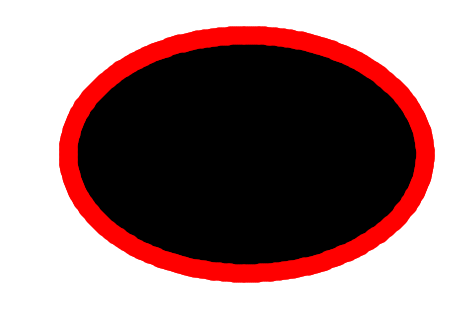

In [80]:
#We can try to understand this network now
nx.draw_circular(G)

Pretty!

Understanding non-trivial networks is difficult by plotting the network because of the large number of nodes and edges that would overlap. For this reason we typically look at distributions of network statistics, such as the distribution of degrees.

25 263


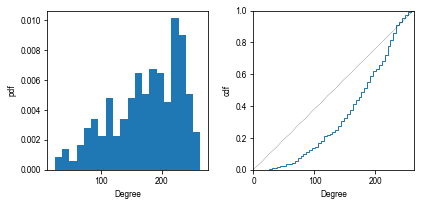

In [89]:
#Plotting the distribution of degrees
degrees = [G.degree(n) for n in G.nodes()]
degrees.sort()
print( min(degrees), max(degrees) )

fig = plt.figure(figsize=(6,3))

ax = plt.subplot(121)
ax.hist(degrees, bins=20, normed=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')

ax = plt.subplot(122)
ax.hist(degrees, bins=50, normed=True, cumulative=True, histtype='step')
ax.set_xlim(0, max(degrees))
ax.set_ylim(0, 1.0)
ax.set_xlabel('Degree')
ax.set_ylabel('cdf')
ax.plot([0, max(degrees)], [0, 1.0], ':', color='black', linewidth=0.5)

plt.tight_layout()

So what we can see is that there is a slight peak near the larger side of the distribution, this means that there are a number of Divvy stations that see a large number of trips. 

Since the Divvy Trip network is a transportation network (it shows movement from one station to another) we can look at betweenness centrality. Betweenness centrality for a node `i` is the sum of the fraction of shortest paths that pass through `i`.

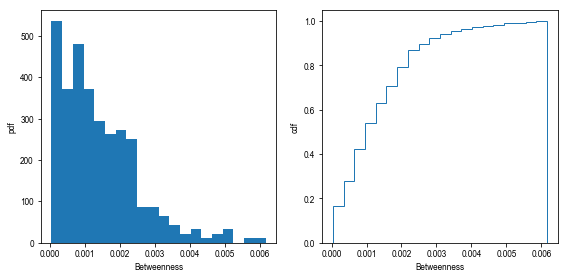

In [93]:
betweenness_dict = nx.betweenness_centrality(G)
plot_distributions(list(betweenness_dict.values()), 'Betweenness')

Now we should look and see if this network is assortative. That means, what is my degree versus my neighbor's degree? Am I typically connected to neighbors that have the same degree as me or not?

In [94]:
avg_neigh_degrees = nx.average_neighbor_degree(G)

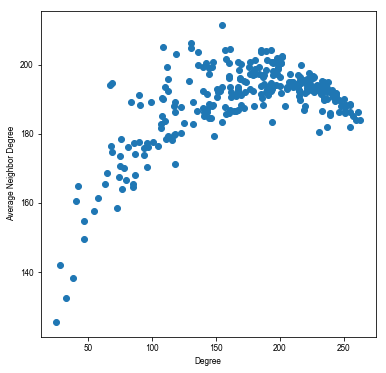

In [100]:
xdata, ydata = [], []
for n, avg_neigh_degree in avg_neigh_degrees.items():
    xdata.append(G.degree(n))
    ydata.append(avg_neigh_degree)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(xdata, ydata, 'o')
ax.set_xlabel('Degree')
ax.set_ylabel('Average Neighbor Degree')

Here we see that the network is assortative, nodes with a high-degree have neighbors that also have a high degree. This makes sense since this network exists in a real geography (Divvy Bike Stations exist at certain locations, users aren't likely to skip lots of stations where they could potentially dock them and then not be charged for additional time).

We can and should check this though. Implement a function to calculate the distance between two stations with the [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula)

In [ ]:
#Exercise


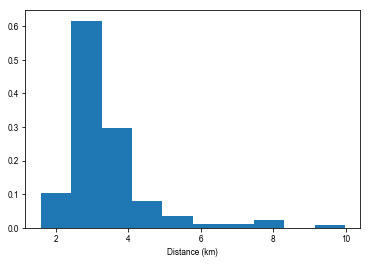

In [104]:
#Now let's calculate the neighbor distances
import numpy as np

avg_neighbor_distances = []
for inode in G.nodes_iter():
    inode_distances = []
    for jnode in G.neighbors(inode):
        pt1 = (G.node[inode]['latitude'], G.node[inode]['longitude'])
        pt2 = (G.node[jnode]['latitude'], G.node[jnode]['longitude'])
        if pt1 != pt2:
            inode_distances.append(calculate_distance(pt1, pt2))
        else:
            inode_distances.append(0)
    avg_neighbor_distances.append(np.mean(inode_distances))
    
plt.hist(avg_neighbor_distances, normed=True)
plt.xlabel('Distance (km)')

Interesting, this appears to be a pretty small distance. But to make sure we should calculate and plot the differences between distance between neighbors and distance between non-neighbors

In [ ]:
#Exercise


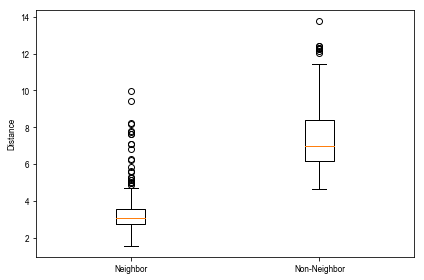

In [107]:
ax = plt.subplot(111)
ax.boxplot([avg_neighbor_distances, avg_non_neighbor_distances])
plt.setp(ax, xticklabels=['Neighbor', 'Non-Neighbor'])
ax.set_xlim(0.5,2.5)
ax.set_ylabel('Distance')
plt.tight_layout()

Now let's test whether these two distributions from the same distribution or not, using the Kolmogorov-Smirnov test.

**Are these two distributions the same or not?**

In [109]:
from scipy.stats import ks_2samp

D, p = ks_2samp(avg_neighbor_distances, avg_non_neighbor_distances)
print( p )

2.03803289175e-113


# Statistical tests and edge randomizations

This was a pretty simple problem, but we're not always interested that in a quantity that can be tested by non-neighbor nodes. In those situations we will typically create an ensemble of randomized networks and in each randomized network calculating our quantity of interest. We then see if our known quantity is the a part of the same distribution from the randomized set. Let's test that way now.

Since there is a small number of edges in the network, let's do randomize 5 times the number of edges in the network and make 100 versions of these networks.

In [18]:
def calc_neigh_distances(G): 
    avg_neighbor_distances = []
    for inode in G.nodes_iter():
        inode_distances = []
        for jnode in G.neighbors(inode):
            pt1 = (G.node[inode]['latitude'], G.node[inode]['longitude'])
            pt2 = (G.node[jnode]['latitude'], G.node[jnode]['longitude'])
            if pt1 != pt2:
                inode_distances.append(calculate_distance(pt1, pt2))
            else:
                inode_distances.append(0)
        avg_neighbor_distances.append(np.mean(inode_distances))
    return avg_neighbor_distances

Now write the randomization code on your own. **Hint:** check the documentation to see if there is a way to randomize the graph edges.

In [ ]:
#Exercise


The z-score for this randomization is: -106.280197
So...yes...pretty significant


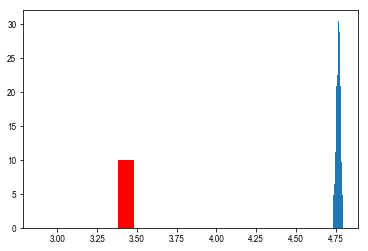

In [112]:
plt.hist(randomized_avg_neigh_distances, normed=True)
plt.hist([np.average(avg_neighbor_distances)], normed=True, color='red')

#Calculate the significance:
z_score = (np.average(avg_neighbor_distances) - np.average(randomized_avg_neigh_distances))/np.std(randomized_avg_neigh_distances)
print( "The z-score for this randomization is: %f" % z_score )
print( "So...yes...pretty significant" )

# Network Path Traversal

Another important part is traversing a network. What are two easy ways that this could be done?

**answer is....**

Breadth-first or depth-first

Perfect!

Now let's implement breadth first of these algorithms

so if we have a tree like:

`
 -> My tree starting from Z
     Z
  |     |
  B     C
|  |  |  |
D  E  F  G
`

The answer should be:
[B, C, D, E, F, G]

In [ ]:
#Exercise


But there's a simpler way to do this, since it's a built in method of networkx